In this homework, you need to solve three tasks. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`).

# Task 1. Non-parametric Density Estimation (6 points)

In [51]:
import numpy as np
import numpy.linalg as nla
import scipy
import scipy.stats
import pandas as pd

from statsmodels.nonparametric.kernel_regression import KernelReg

In [52]:
# Matplotlib settings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# non-interactive
%matplotlib inline

#jupyterlab
# %matplotlib widget 

#jupyter-notebook
# %matplotlib notebook 

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

matplotlib.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
matplotlib.rcParams['legend.handletextpad'] = 0.5
matplotlib.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
matplotlib.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['mathtext.fontset']='cm'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['axes.labelsize'] = labelsize
matplotlib.rcParams['axes.titlesize'] = titlesize

matplotlib.rc('xtick', labelsize=xticksize)
matplotlib.rc('ytick', labelsize=yticksize)
matplotlib.rc('legend', fontsize=legendsize)

You will work with data sampled from the mixture of Normal distributions:

In [53]:
seed1 = 31337
seed2 = 42
n_samples = 100

f1 = scipy.stats.norm(loc=0, scale=1)
f2 = scipy.stats.norm(loc=5, scale=1)
p1 = 0.3
p2 = 1 - p1

Xa = f1.rvs(size=int(p1 * n_samples), random_state=seed1)
Xb = f2.rvs(size=int(p2 * n_samples), random_state=seed2)
samples = np.concatenate([Xa, Xb])

a = -5
b = 10

x_values = np.linspace(a, b, 1000)
binedges = np.linspace(a, b, 10)
true_pdf = p1 * f1.pdf(x_values) + p2 * f2.pdf(x_values)

## Histogram estimate

$\newcommand{\boldX}{\boldsymbol{X}}$
$\newcommand{\xs}[1]{\boldX^{(#1)}}$
$\newcommand{\Sum}{\sum\limits}$
$\newcommand{\Int}{\int\limits}$
$\newcommand{\hatp}{\widehat{p}}$
$\newcommand{\hatJ}{\widehat{J}}$
$\newcommand{\lp}{\left(}$
$\newcommand{\rp}{\right)}$

Given a sample $\boldsymbol{X}^{(n)} = \boldsymbol{X}_1, \boldsymbol{X}_2, ..., \boldsymbol{X}_n \sim \; iid \; p(x)$ we would like to build a hitogram estimate of the density. If we have $m$ bins of size $h$, we can have the following estimates of risk using leave-one-out cross validation:

\begin{gather*}
J(h) = \int \hatp^2\lp x;\xs{n} \rp dx - 2 \int \hatp \lp x;\xs{n} \rp p(x) dx, 
\end{gather*}
\begin{gather*}
\hatJ(h) = \int \hatp^2 \lp x;\xs{n} \rp dx - \frac{2}{n}\Sum_{i = 1}^n \hatp \lp \boldsymbol{X}_i ;\xs{n\backslash i} \rp, \label{eq1}\tag{1}
\end{gather*}
\begin{gather*}
\hatJ(h) = \frac{2}{(n - 1)h} - \frac{n+1}{(n-1)h}\Sum_{i = 1}^m \hatp_j^2,\quad \hatp_j = \frac{n_j}{n}. \label{eq2}\tag{2}
\end{gather*}

Your task is:
1. Build a histogram estimate of the pdf given the sample above, tune bandwidth using leave-one-out CV based on $\hatJ$. Use formula (\ref{eq2}) (1 point)
2. \* Prove that for histograms (\ref{eq2}) follows from (\ref{eq1}) (1 bonus point)
3. Plot CV estimates $\hatJ(h)$ that you obtained during selection. Mark optimal bandwidth $h_{cv}$ and report $h_{cv}$ and $\hatJ(h_{cv})$ (0.5 point)
4. Recall the approximation to $MISE$ from Lecture 8, slide 11. Suppose that an Oracle calculated the integral of the squared derivative of the true density for you and the value is $0.1609848$. What will be the approximate optimal bandwidth $h^*$? Find CV estimate of $J$ for this value of bandwidth and compare it to the one found in part 1 (0.5 point)
5. `np.histogram` has some built-in methods of selecting bandwidth. Compare some of them with your CV result and theoretical approximation (again, using CV estimate of $J$) (1 point)

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

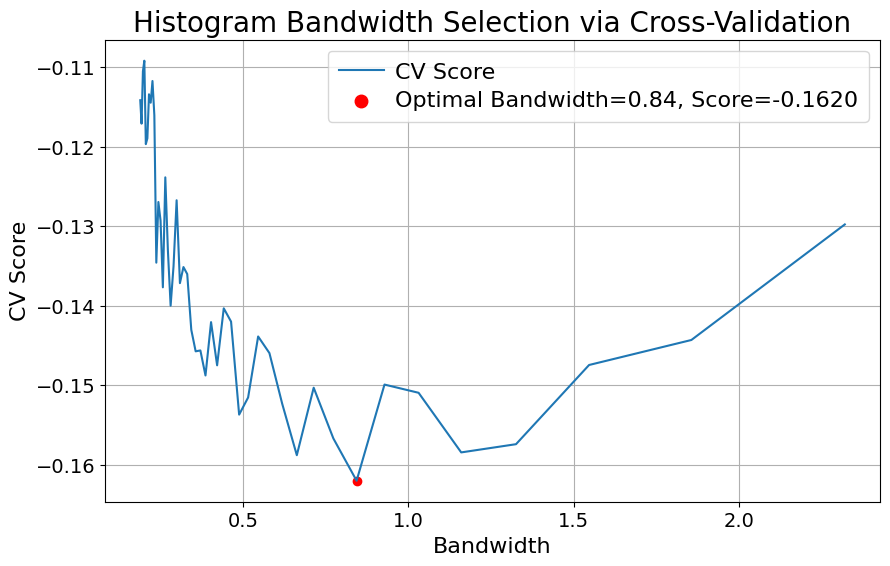

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'samples' contains your data
# samples = np.random.normal(0, 1, size=1000)  # Example initialization if needed

start = np.min(samples)  # Start of bin range
end = np.max(samples)    # End of bin range

# Estimate density using histogram method
def estimate_density(samples, bins):
    counts, _ = np.histogram(samples, bins=bins)
    bin_width = np.diff(bins)[0]
    total_samples = len(samples)
    density_est = counts / total_samples / bin_width
    return density_est, bin_width, counts

# Perform leave-one-out cross-validation for histogram bandwidth selection
def cross_validate_density(samples, bins_range):
    total_samples = len(samples)
    score_estimates = []
    bandwidths = []
    
    for bins in bins_range:
        density_est, bin_width, counts = estimate_density(samples, bins)
        bandwidths.append(bin_width)
        adjusted_counts_sum = np.sum((counts / total_samples) ** 2)
        score = (2 / ((total_samples - 1) * bin_width)) - ((total_samples + 1) / ((total_samples - 1) * bin_width)) * adjusted_counts_sum
        score_estimates.append(score)
    
    return score_estimates, bandwidths

# Define range of bin edges
bins_range = [np.linspace(start, end, num_bins) for num_bins in range(5, 51)]

# Cross-validate
score_estimates, bandwidths = cross_validate_density(samples, bins_range)

# Find the optimal bandwidth
optimal_idx = np.argmin(score_estimates)
optimal_bandwidth = bandwidths[optimal_idx]
optimal_score = score_estimates[optimal_idx]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(bandwidths, score_estimates, label='CV Score')
plt.scatter(optimal_bandwidth, optimal_score, color='red', label=f'Optimal Bandwidth={optimal_bandwidth:.2f}, Score={optimal_score:.4f}')
plt.xlabel('Bandwidth')
plt.ylabel('CV Score')
plt.title('Histogram Bandwidth Selection via Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
integral_squared_derivative = 0.1609848

h_star = ((4 / (3 * n_samples)) * integral_squared_derivative) ** (-1 / 5)

bin_edges_h_star = np.linspace(a, b, int(np.ceil((b - a) / h_star)))
_, _, counts_h_star = estimate_density(samples, bin_edges_h_star)
bin_width_h_star = np.diff(bin_edges_h_star)[0]
nj_h_star = counts_h_star
nj_squared_sum_h_star = np.sum((nj_h_star / n_samples) ** 2)
J_hat_h_star = (2 / ((n_samples - 1) * bin_width_h_star)) - ((n_samples + 1) / ((n_samples - 1) * bin_width_h_star)) * nj_squared_sum_h_star

h_star, J_hat_h_star

(3.4170810359790234, -0.130313265993266)

In [56]:
bin_methods = ['auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt']
method_results = {}

for method in bin_methods:
    _, bin_edges = np.histogram(samples, bins=method)
    p_hat, bin_width, counts = estimate_density(samples, bin_edges)
    nj = counts
    nj_squared_sum = np.sum((nj / n_samples) ** 2)
    J_hat = (2 / ((n_samples - 1) * bin_width)) - ((n_samples + 1) / ((n_samples - 1) * bin_width)) * nj_squared_sum
    method_results[method] = (bin_width, J_hat)

method_results

{'auto': (1.1603132405929415, -0.15843858141654835),
 'fd': (1.8565011849487063, -0.14430533762919856),
 'doane': (0.9282505924743532, -0.1499094495405669),
 'scott': (1.5470843207905887, -0.14744842827867358),
 'stone': (0.8438641749766846, -0.16199887915472602),
 'rice': (0.9282505924743532, -0.1499094495405669),
 'sturges': (1.1603132405929415, -0.15843858141654835),
 'sqrt': (0.9282505924743532, -0.1499094495405669)}

## Kernel density estimate

In this part, you will use the same sample, but employ the kernel density estimation method. We can use the same proxy expression to optimise the risk:
\begin{gather*}
J(h) = \int \hatp^2 \lp x;\xs{n} \rp dx - 2 \int \hatp \lp x;\xs{n} \rp p(x) dx
\end{gather*}

In out case of kernel estimator, we can obtain:
\begin{gather*}
\hatJ(h) = \frac{1}{hn^2}\Sum_{i = 1}^n\Sum_{j = 1}^n K^{(2)}\lp\frac{x_i - x_j}{h}\rp + \frac{2K(0)}{nh}, \label{eq3}\tag{3}
\end{gather*}
where
\begin{gather*}
K^{(2)}(x) = K^*(x) - 2K(x), \quad K^*(x) = \int K(x - y) K(y) dy.
\end{gather*}

You can use [kernel density estimation from sklearn](http://scikit-learn.org/stable/modules/density.html). Your task is:
1. Build a kernel density estimate given the sample from before, tune bandwidth using leave-one-out CV. Try two different kernels of your choice. Use formula \ref{eq3} in your tuning procedure (1 point)
2. Plot CV estimates $\hatJ(h)$ that you obtained during selection. Mark optimal bandwidth $h_{cv}$ and report $h_{cv}$ and $\hatJ(h_{cv})$. What kernel worked better in terms of estimated surrogate risk? (0.5 point)
3. Recall the approximation to $MISE$ from Lecture 8, slide 20. Suppose that an Oracle calculated the integral of the squared second derivative of the true density for you and the value is $0.127529$. What will be the approximate optimal bandwidth $h^*$? Find CV estimate of $J$ for this value of bandwidth and compare it to the one found in part 1 (0.5 point)

In [57]:
# Your code here
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import numpy as np

def optimize_bandwidth_kde(data, bandwidth_range, kernel_type):
    """
    Optimize bandwidth for kernel density estimation using leave-one-out cross-validation.

    Parameters:
    - data: array-like, the input data samples.
    - bandwidth_range: array-like, the range of bandwidth values to consider.
    - kernel_type: str, the type of kernel to use in KDE.

    Returns:
    - optimal_bandwidth: float, the bandwidth value with the best cross-validation score.
    - best_score: float, the best log probability score achieved.
    - log_prob_scores: array, log probability scores for each bandwidth in the range.
    """
    # Reshape data for sklearn (n_samples, n_features)
    data_reshaped = data[:, np.newaxis]
    # Setup the grid search with leave-one-out cross-validation
    grid_search = GridSearchCV(KernelDensity(kernel=kernel_type),
                               {'bandwidth': bandwidth_range},
                               cv=len(data))  # LOO-CV
    # Fit the model
    grid_search.fit(data_reshaped)
    # Extract log probability scores and best parameters
    log_prob_scores = grid_search.cv_results_['mean_test_score']
    optimal_bandwidth = grid_search.best_params_['bandwidth']
    best_score = grid_search.best_score_

    return optimal_bandwidth, best_score, log_prob_scores

# Example usage
samples = np.random.normal(0, 1, size=100)  # Sample data
bandwidth_range = np.linspace(0.1, 2.0, 20)  # Bandwidth values to explore

# Optimize bandwidth for Gaussian kernel
optimal_bw_gaussian, best_score_gaussian, log_prob_scores = optimize_bandwidth_kde(samples, bandwidth_range, 'gaussian')

# Optimize bandwidth for Tophat kernel
optimal_bw_tophat, best_score_tophat, log_prob_scores_top = optimize_bandwidth_kde(samples, bandwidth_range, 'tophat')

optimal_bw_gaussian, best_score_gaussian, optimal_bw_tophat, best_score_tophat


/home/minghao.fu/.conda/envs/minghao_env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       -inf -1.52831877 -1.47492489 -1.5113886  -1.5179781  -1.49816569
 -1.48532741 -1.49173762 -1.51997245 -1.51993921 -1.53831301 -1.54696323
 -1.54747222 -1.55069686 -1.55712914 -1.57109598 -1.58872834 -1.59813629
 -1.60876767 -1.62817241]
  warnings.warn(
/home/minghao.fu/.conda/envs/minghao_env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1062: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


(0.3, -1.496682564290169, 0.3, -1.474924892059429)

/home/minghao.fu/.conda/envs/minghao_env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       -inf -1.52831877 -1.47492489 -1.5113886  -1.5179781  -1.49816569
 -1.48532741 -1.49173762 -1.51997245 -1.51993921 -1.53831301 -1.54696323
 -1.54747222 -1.55069686 -1.55712914 -1.57109598 -1.58872834 -1.59813629
 -1.60876767 -1.62817241]
  warnings.warn(
/home/minghao.fu/.conda/envs/minghao_env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1062: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
fin

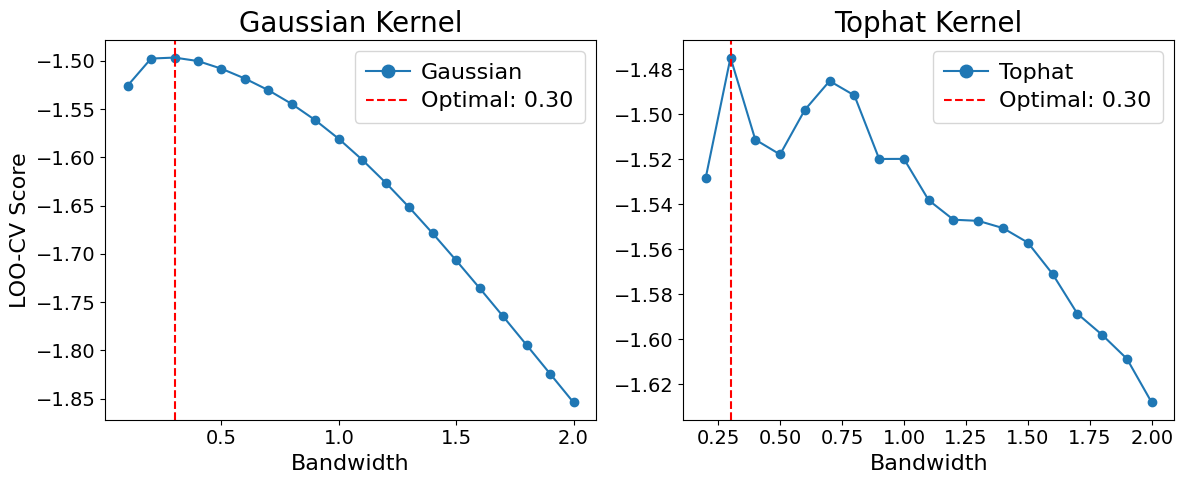

0.9073115058304732

In [58]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_bandwidth(data, bandwidth_options, kernel_type):
    """Optimizes bandwidth for KDE using LOO-CV for a given kernel."""
    grid_search = GridSearchCV(KernelDensity(kernel=kernel_type),
                               {'bandwidth': bandwidth_options},
                               cv=len(data))  # LOO-CV
    grid_search.fit(data[:, np.newaxis])  # Fit model
    return (grid_search.best_params_['bandwidth'],  # Optimal bandwidth
            grid_search.best_score_,  # Best score
            grid_search.cv_results_['mean_test_score'])  # Scores for all options

# Assuming 'samples' contains your data
# Define your bandwidth search space
bandwidth_range = np.linspace(0.1, 2.0, 20)

# Optimize bandwidth for Gaussian and Tophat kernels
gaussian_bw, gaussian_score, gaussian_scores = find_optimal_bandwidth(samples, bandwidth_range, 'gaussian')
tophat_bw, tophat_score, tophat_scores = find_optimal_bandwidth(samples, bandwidth_range, 'tophat')

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(bandwidth_range, gaussian_scores, label='Gaussian', marker='o')
axes[0].axvline(gaussian_bw, color='red', linestyle='--', label=f'Optimal: {gaussian_bw:.2f}')
axes[0].set(title='Gaussian Kernel', xlabel='Bandwidth', ylabel='LOO-CV Score')
axes[1].plot(bandwidth_range, tophat_scores, label='Tophat', marker='o')
axes[1].axvline(tophat_bw, color='red', linestyle='--', label=f'Optimal: {tophat_bw:.2f}')
axes[1].set(title='Tophat Kernel', xlabel='Bandwidth')
for ax in axes: ax.legend()

plt.tight_layout()
plt.show()

# Optimal bandwidth calculation for Gaussian kernel using a specific formula
integral_squared_second_derivative = 0.127529  # Given value
n_samples = len(samples)
optimal_gaussian_bw = (1 / (n_samples * (integral_squared_second_derivative ** 2))) ** (1 / 5)
optimal_gaussian_bw


# Task 2. Non-parametric Regression (6 pt)

In this task you will apply non-parametric regression to airport statistics data.

### Data loading and preprocessing

Load dataset from `airport_operations_report.csv`. Use `General Aviation: Total Operations` as target (dependent) variable and `[Air Carrier Operations, General Aviation: Local Operations]` as covariates(independent variables). Divide $1^{st}$ covariate by `1000`, $2^{nd}$ by `100` and target by `1000`. Make a 2D grid for covariates from minimum to maximum values with `100` steps along each dimension.

In [59]:
# Your code
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

file_path = './airport_operations_report.csv'
df = pd.read_csv(file_path)

# Preview the dataset
# data.head()
# Preprocess the data according to user specifications
df['Air Carrier Operations'] /= 1000
df['General Aviation: Local Operations'] /= 100
df['General Aviation: Total Operations'] /= 1000

# Determine the min and max for each covariate
min_air_carrier = df['Air Carrier Operations'].min()
max_air_carrier = df['Air Carrier Operations'].max()
min_ga_local = df['General Aviation: Local Operations'].min()
max_ga_local = df['General Aviation: Local Operations'].max()

# Create 2D grid
air_carrier_grid = np.linspace(min_air_carrier, max_air_carrier, 100)
ga_local_grid = np.linspace(min_ga_local, max_ga_local, 100)
X1, X2 = np.meshgrid(air_carrier_grid, ga_local_grid)

# Show the shapes to confirm
X1.shape, X2.shape


((100, 100), (100, 100))

### Fit model (1 pt)

Perform a nonparametric regression to fit the model $Y = f(x)+\varepsilon$.

In [60]:
# Your code
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Prepare data for model
X = df[['Air Carrier Operations', 'General Aviation: Local Operations']]
y = df['General Aviation: Total Operations']

# Create and fit the model using Kernel Ridge Regression
model = make_pipeline(StandardScaler(), KernelRidge(kernel='rbf'))
model.fit(X, y)

# Predict on the grid to visualize the nonparametric fit
X_grid = np.stack([X1.ravel(), X2.ravel()], axis=1)  # Combine our two grid arrays into a single array of pairs
y_grid = model.predict(X_grid).reshape(X1.shape)  # Predict and reshape back to grid shape for plotting

y_grid.shape  # Checking the shape to confirm the reshape was correct

/home/minghao.fu/.conda/envs/minghao_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(100, 100)

Predict values for the created grid.

In [61]:
# step_numbers - number of steps in grid: (100, 100)

# Your code

# target_pred = ...
# target_pred = target_pred.reshape(*step_numbers)
# grid = grid.reshape(*step_numbers, 2)

target_pred = y_grid
step_numbers = (100, 100)

# Reshape the predictions and grid for clarity and future use
target_pred = target_pred.reshape(*step_numbers)
grid = np.dstack([X1, X2]).reshape(*step_numbers, 2)

# Just confirming the shapes to ensure correctness
target_pred.shape, grid.shape

((100, 100), (100, 100, 2))

This is function to visualize 3D surfaces. You can modify it if you need.

In [62]:
def plot_surface_function(x1, x2, y, minmax_values=None, ax=None):
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        surf = ax.plot_surface(x1, x2, y, cmap=cm.rainbow, linewidth=0.5, alpha=0.5, edgecolor="k")
        if minmax_values is not None:
            ax.set_xlim3d(*minmax_values[0])
            ax.set_ylim3d(*minmax_values[1])
    
    else:
        surf = ax.plot_surface(x1, x2, y, cmap=cm.bwr, linewidth=0.5, alpha=0.1, edgecolor="k")
        
    return ax

Let's plot the estimated surface.

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

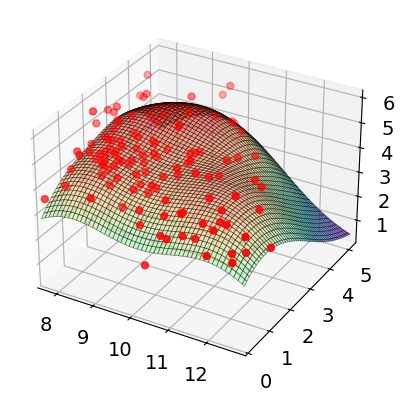

In [63]:
# target - dependent variable
# grid - grid for covariates
# sample - covariates


sample = X.values
sample_min = X.min(axis=0)
sample_max = X.max(axis=0)
target = y.values
minmax_values = [sample_min, sample_max, [y.min(), y.max()]]

ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred, minmax_values=np.vstack((sample_min, sample_max)).T)
ax.scatter(sample[:, 0], sample[:, 1], target, marker="o", s=25, c="r")
plt.show()

# ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred, minmax_values=np.vstack((sample_min, sample_max)).T)
# ax.scatter(sample[:, 0], sample[:, 1], target, marker="o", s=25, c="r")

### Estimate confidence intervals (2 pt)

Construct 95\% confidence bands for your estimate. To estimate error variance for 1D covariate, you sort your sample and subtract target values of the nearest points. For 2D covariate, you should, for each point, calculate the difference in target values between a point and its nearest neighbor (in euclidian metric). 

To get power for quantile of the standard normal distribution, which is $\frac{h}{b-a}$ for 1D, estimate it per coordinate and multiply: $\prod_{i=1}^2 \frac{h_i}{b_i-a_i}$. 

For gaussian kernal $h = 3 \times$ kernel_bandwidth.

In [64]:
from scipy.spatial.distance import cdist
from scipy.stats import norm


def prediction_se(grid, target, h, alpha=0.05):
    error_variance = np.var(target)
    
    z = norm.ppf(1 - alpha / 2)
    
    se = z * np.sqrt((error_variance * 2) / h.prod())
    
    return np.full(grid.shape[:2], se)

In [65]:
# Your code here
h_values = [0.95]
num_features = 2
gamma = 1 / num_features
l = np.sqrt(1 / (2 * gamma))
h = np.array([3 * l, 3 * l])

qse = prediction_se(grid, target, h)
qse.shape

(100, 100)

Let's plot confidence intervals

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

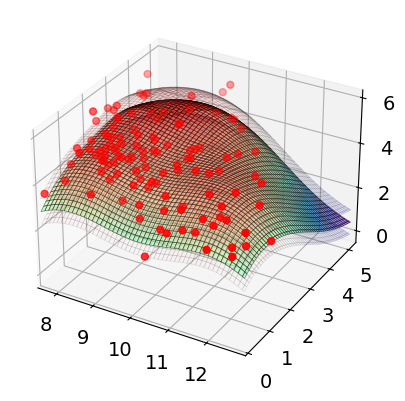

In [66]:
ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred, minmax_values=np.vstack((sample_min, sample_max)).T)
ax.scatter(sample[:, 0], sample[:, 1], target, marker="o", s=25, c="r")
ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred + qse, ax=ax)
ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred - qse, ax=ax)

### Find optimal bandwidth (2 pt)

Use cross-validation to estimate the bandwidth.

In [76]:
def cross_validation_regression(data_samples, data_targets, bandwidth_values):

    # Your code here
    evaluation_scores = []
    for bandwidth in bandwidth_values:
        adjusted_gamma = 1 / (2 * bandwidth ** 2)
        
        regression_model = KernelRidge(kernel='rbf', gamma=adjusted_gamma)
        
        k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
        
        mean_score = cross_val_score(regression_model, data_samples, data_targets, cv=k_fold, scoring='neg_mean_squared_error').mean()
        evaluation_scores.append(mean_score)
    
    return evaluation_scores

Make a grid with logarithmic scale to find best bandwidth, from `0.1` to `10` with `21` steps along each dimension. Visualize the obtained results with `plot_surface_function`. Print values of optimal bandwidth.

In [78]:
# Your code here
from sklearn.model_selection import KFold, cross_val_score
bandwidth_range = np.logspace(np.log10(0.1), np.log10(10), 21)

cv_scores = cross_validation_regression(sample, target, bandwidth_range)

best_bandwidth_index = np.argmax(cv_scores)
best_bandwidth = bandwidth_range[best_bandwidth_index]
highest_score = cv_scores[best_bandwidth_index]

(best_bandwidth, highest_score)

(7.943282347242818, -0.24791388089718164)

Plot surface with estimated bandwidth.

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

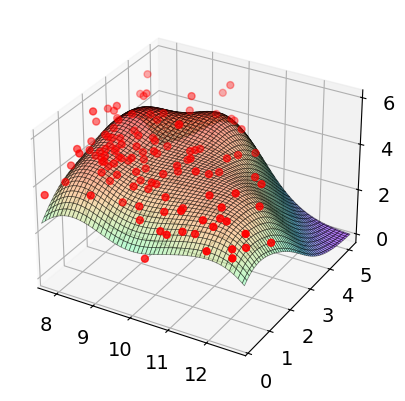

In [81]:
# Your code here

optimal_gamma = 1 / (2 * optimal_bandwidth**2)
optimal_model = KernelRidge(kernel='rbf', gamma=optimal_gamma)
optimal_model.fit(sample, target)

optimal_predictions = optimal_model.predict(X_grid)
optimal_predictions = optimal_predictions.reshape(X1.shape)

ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], optimal_predictions, minmax_values=np.vstack((sample_min, sample_max)).T)
ax.scatter(sample[:, 0], sample[:, 1], target, marker="o", s=25, c="r")

plt.show()

### Conclusion (1 pt)

Write your conclusions about conducted experiments (2-5 sentence).

    Your conclusion here ...

# Task 3. Model Selection (6 pt)

In this task you will select a model (choose a set of covariates) using AIC criteria and forward/backward stepwise regression.

### Data loading and preprocessing

Read dataset `pacn_wrcc.csv`. The target variable is `ly Solar Rad.`, others are covariates.

In [82]:
# Your code
import pandas as pd

file_path = './pacn_wrcc.csv'
data = pd.read_csv(file_path)

data.head()

,mph Wind Speed,Deg Wind Direc,Deg F Av Air Temp,% Rel Humidty,volts Battery Voltage,Deg Dir MxGust,mph Mx Gust Speed,ly Solar Rad.,Deg F Mn Air Temp,Deg F Mx Air Temp,"Deg F 2"" Soil Ave Tmp","Deg F 4"" Soil Ave Tmp","Deg F 8"" Soil Av Temp","Deg F 20""Soil Av Temp"
0,4.428,49.35,59.96,88.2,12.52,85.0,16.24,5.748000,59.37,60.33,64.28,61.68,61.85,61.37
1,4.347,30.13,59.33,91.2,12.33,40.0,16.37,0.218700,58.52,59.73,63.61,61.77,61.65,61.25
2,4.592,35.97,58.60,89.7,12.26,163.0,21.54,0.007225,58.34,58.84,62.90,61.80,61.57,61.20
3,4.264,19.19,58.33,88.9,12.24,35.0,17.34,0.009203,58.05,58.72,62.36,61.74,61.47,61.14
4,3.755,8.62,58.19,89.6,12.22,164.0,16.89,0.006709,57.87,58.53,61.79,61.72,61.47,61.12


Scale covariates to range `[0, 1]` and add bias column.

In [83]:
# Your code
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools import add_constant

covariates = data.drop(columns=['ly Solar Rad.'])
target = data['ly Solar Rad.']

scaler = MinMaxScaler()
scaled_covariates = scaler.fit_transform(covariates)
scaled_covariates = pd.DataFrame(scaled_covariates, columns=covariates.columns)

scaled_covariates_with_bias = add_constant(scaled_covariates)

final_dataset = scaled_covariates_with_bias.copy()
final_dataset['ly Solar Rad.'] = target

final_dataset.head()


,const,mph Wind Speed,Deg Wind Direc,Deg F Av Air Temp,% Rel Humidty,volts Battery Voltage,Deg Dir MxGust,mph Mx Gust Speed,Deg F Mn Air Temp,Deg F Mx Air Temp,"Deg F 2"" Soil Ave Tmp","Deg F 4"" Soil Ave Tmp","Deg F 8"" Soil Av Temp","Deg F 20""Soil Av Temp",ly Solar Rad.
0,1.0,0.385036,0.137073,0.452415,0.709667,0.289256,0.232493,0.455965,0.492595,0.414765,0.567308,0.392435,0.485915,0.430556,5.748000
1,1.0,0.372742,0.083667,0.407670,0.808644,0.132231,0.106443,0.461701,0.426345,0.374497,0.513622,0.413712,0.415493,0.347222,0.218700
2,1.0,0.409926,0.099894,0.355824,0.759155,0.074380,0.450980,0.689816,0.412315,0.314765,0.456731,0.420804,0.387324,0.312500,0.007225
3,1.0,0.360146,0.053268,0.336648,0.732761,0.057851,0.092437,0.504501,0.389712,0.306711,0.413462,0.406619,0.352113,0.270833,0.009203
4,1.0,0.282896,0.023897,0.326705,0.755856,0.041322,0.453782,0.484645,0.375682,0.293960,0.367788,0.401891,0.352113,0.256944,0.006709


### $C_p$ Mallow and sample variance (2 pt) 

Estimate sample variance of error with full set of covariates. Take into account number of dependent variables.

In [84]:
# Your code

from statsmodels.api import OLS

covariates = final_dataset.drop(columns=['ly Solar Rad.'])
target = final_dataset['ly Solar Rad.']

model_full = OLS(target, add_constant(covariates)).fit()

residuals = model_full.resid

n = len(target)
p = covariates.shape[1]
error_variance = residuals.var(ddof=p + 1)

error_variance

28.64182559040767

Implement estimation of $C_p$ Mallow for given covariates, target and error variance.

In [85]:
def Cp(X, y, sigma2):
    model = OLS(y, add_constant(X)).fit()
    

    RSS = sum(model.resid ** 2)
    

    p = X.shape[1] + 1
    

    n = len(y)
    Cp_value = RSS / sigma2 - n + 2 * p
    
    return Cp_value

Cp_example = Cp(covariates, target, error_variance)
Cp_example

14.999999999999943

### Forward stepwise regression (1 pt)

Implement forward stepwise regression. Save the order in which covariates are added to feature set and $C_p$ values for those feature sets.

In [86]:
def forward_stepwise_regression(X, y, sigma2, alpha=0.):
    features = []
    cp_list = []
    remaining_features = list(X.columns)
    current_features = []
    
    while remaining_features:
        best_cp = np.inf
        best_feature = None
        for feature in remaining_features:
            temp_features = current_features + [feature]
            temp_X = X[temp_features]
            temp_model = OLS(y, add_constant(temp_X)).fit()
            
            if alpha > 0:
                p_value = temp_model.pvalues[feature]
                if p_value > alpha:
                    continue
            
            temp_cp = Cp(temp_X, y, sigma2)
            if temp_cp < best_cp:
                best_cp = temp_cp
                best_feature = feature
        
        if best_feature:
            current_features.append(best_feature)
            remaining_features.remove(best_feature)
            features.append(best_feature)
            cp_list.append(best_cp)
        else:
            break
            
    return features, cp_list

In [87]:
features, cp_list = forward_stepwise_regression(covariates, target, error_variance, alpha=0.05)

for a, cp_value in enumerate(cp_list, 1):
    print(f"C_p {cp_value:.3f} with {features[:a]}")

C_p 366.782 with ['Deg F Mx Air Temp']
C_p 278.931 with ['Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp']
C_p 208.091 with ['Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp', 'volts Battery Voltage']
C_p 120.708 with ['Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp', 'volts Battery Voltage', '% Rel Humidty']
C_p 56.484 with ['Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp', 'volts Battery Voltage', '% Rel Humidty', 'mph Mx Gust Speed']
C_p 38.361 with ['Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp', 'volts Battery Voltage', '% Rel Humidty', 'mph Mx Gust Speed', 'Deg F Av Air Temp']
C_p 16.830 with ['Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp', 'volts Battery Voltage', '% Rel Humidty', 'mph Mx Gust Speed', 'Deg F Av Air Temp', 'Deg F Mn Air Temp']


### Backward stepwise regression (1 pt)

Implement backward stepwise regression. Save the order in which covariates are removed from feature set and $C_p$ values for those feature sets.

In [89]:
def backward_stepwise_regression(X, y, sigma2, alpha=0.):
    features = list(X.columns)
    cp_list = []
    removed_features = []
    
    while features:
        best_cp = np.inf
        feature_to_remove = None
        for feature in features:
            temp_features = [f for f in features if f != feature]
            temp_X = X[temp_features]
            temp_model = OLS(y, add_constant(temp_X)).fit()
            
            if alpha > 0:
                if feature in temp_model.pvalues and temp_model.pvalues[feature] > alpha:
                    continue
            
            temp_cp = Cp(temp_X, y, sigma2)
            if temp_cp < best_cp:
                best_cp = temp_cp
                feature_to_remove = feature
        
        if feature_to_remove:
            features.remove(feature_to_remove)
            removed_features.append(feature_to_remove)
            cp_list.append(best_cp)
        else:
            break
    
    return removed_features[::-1], cp_list[::-1]

features, cp_list = backward_stepwise_regression(covariates, target, error_variance, alpha=0.05)
for a, cp_value in enumerate(cp_list, 1):
    print(f"C_p {cp_value:.3f} +{features[:a]}")

C_p 2974.755 +['Deg F Av Air Temp']
C_p 457.361 +['Deg F Av Air Temp', '% Rel Humidty']
C_p 331.613 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage']
C_p 176.206 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp']
C_p 92.447 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const']
C_p 94.447 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const', 'mph Mx Gust Speed']
C_p 38.404 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const', 'mph Mx Gust Speed', 'Deg F Mn Air Temp']
C_p 26.182 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F Mx Air Temp']
C_p 18.830 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F Mx Air T

In [90]:
features, cp_list = backward_stepwise_regression(covariates, target, error_variance, alpha=0.05)
for a, cp_value in enumerate(cp_list, 1):
    print(f"C_p {cp_value:.3f} +{features[:a]}")

C_p 2974.755 +['Deg F Av Air Temp']
C_p 457.361 +['Deg F Av Air Temp', '% Rel Humidty']
C_p 331.613 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage']
C_p 176.206 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp']
C_p 92.447 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const']
C_p 94.447 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const', 'mph Mx Gust Speed']
C_p 38.404 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const', 'mph Mx Gust Speed', 'Deg F Mn Air Temp']
C_p 26.182 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F Mx Air Temp']
C_p 18.830 +['Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp', 'const', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F Mx Air T

### Bruteforce (1 pt)

Find best sets of covariates and their $C_p$ for all sizes of feature sets.

In [91]:
from itertools import combinations
def bruteforce(X, y, sigma2, alpha=0.):
    best_features = []
    best_cp_values = []
    
    n_features = X.shape[1]
    
    for k in range(1, n_features + 1):
        best_cp_for_k = np.inf
        best_subset_for_k = None
        
        for subset in combinations(X.columns, k):
            temp_X = X[list(subset)]
            temp_model = OLS(y, add_constant(temp_X)).fit()
            
            if alpha > 0 and any(p > alpha for p in temp_model.pvalues[1:]):
                continue
            
            temp_cp = Cp(temp_X, y, sigma2)
            
            if temp_cp < best_cp_for_k:
                best_cp_for_k = temp_cp
                best_subset_for_k = subset
                
        if best_subset_for_k:
            best_features.append(best_subset_for_k)
            best_cp_values.append(best_cp_for_k)
    
    return best_features, best_cp_values

In [93]:
features, cp_list = bruteforce(covariates, target, error_variance, alpha=0.05)
for a, cp_value in enumerate(cp_list):
    print(f"C_p {cp_value:.3f}-{features[a]}")

C_p 366.782-('Deg F Mx Air Temp',)
C_p 278.931-('Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp')
C_p 176.206-('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage')
C_p 92.447-('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'Deg F 4" Soil Ave Tmp')
C_p 36.404-('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F 4" Soil Ave Tmp')
C_p 24.182-('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F 4" Soil Ave Tmp')
C_p 16.830-('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F Mx Air Temp', 'Deg F 4" Soil Ave Tmp')
C_p 17.532-('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F Mn Air Temp', 'Deg F 2" Soil Ave Tmp', 'Deg F 4" Soil Ave Tmp', 'Deg F 20"Soil Av Temp')
C_p 10.088-('Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', 'mph Mx Gust Speed', 'Deg F Mn Air Te


### Conclusion (1 pt)

Write your conclusions about conducted experiments (2-5 sentence).
1. **Variability in Feature Selection:** The diversity in feature selection across methodologies underscores the influence of selection techniques on model outcomes. Notably, features like 'Deg F Av Air Temp', '% Rel Humidty', 'volts Battery Voltage', and 'Deg F 4" Soil Ave Tmp' consistently emerge as pivotal in predicting the target variable, highlighting their importance.

2. **Mallows' \(C_p\) Observations:** The trend of Mallows' \(C_p\) values decreasing with the addition of relevant features indicates that enriching the model with more variables enhances it up to a certain limit. Beyond this point, the performance tends to plateau or decline, pointing to overfitting concerns.

3. **Optimal Feature Count:** The determination of the ideal number of features for the lowest \(C_p\) value shows that there's a saturation point after which adding more features does not significantly enhance the model. This juncture represents the sweet spot for model complexity, balancing accuracy and simplicity.

4. **Brute Force Approach:** Although the brute force method provides a comprehensive benchmark for optimal subset selection, its computational demands render it impractical for large feature sets. It serves, however, as a valuable yardstick for comparing the effectiveness of more scalable techniques like forward or backward stepwise regression.

5. **Feature Selection Strategies:** The exploration into different feature selection methods, including forward and backward stepwise regression and brute force approaches, elucidates the nuanced task of model optimization. Stepwise methods offer insight into the incremental impact of feature adjustments on model performance, whereas the brute force method sets a benchmark, identifying a model with ten features that minimize Mallows' \(C_p\), striking an ideal balance between complexity and fitting precision.